In [1]:
import data_utilis as du
import fake_data
import numpy as np
import matplotlib.pyplot as plt
def test_hyp(n_reps,lambdas = [200, 300, 500], A = 50, f=100):
    Ns = []
    peaks_mean=[]
    peaks_std = []
    for lambda_ in lambdas:
        n_parts=100e3
        n_turns = 100e3
        blm = fake_data.generate_fake_blm(n_parts, n_turns, warnings = True, A = A)
        binning = lambda_ # cause the overall extr rate is one 
        
        peaks = []
        
        for n in range(n_reps):
            bins = fake_data.bin_fake_data(blm,turn_binning = binning, add_errors=True,normalize_turns=True, plot=False )
            fftres = du.Ft(bins[1],bins[0][1], normalize_N=True, plot=False, window='flattop')
            peaks.append(np.interp(f,fftres[0],fftres[1]))
            if n==0:
                Ns.append(len(bins[1])) # For the final formula to chek
        peaks_mean.append(np.mean(peaks)) # mean for every lambda value
        peaks_std.append( np.std(peaks)) 
        ### Data to numpy
    peaks_mean = np.array(peaks_mean)
    peaks_std = np.array(peaks_std)
    Ns = np.array(Ns)
    lambdas = np.array(lambdas)
    
    fluctuations_pred = 4*Ns**2 *lambdas**3 / (Ns*lambdas**2 + A**2/2)
    print(len(fluctuations_pred))
        
    plt.figure(figsize=(16,10))
    plt.errorbar(lambdas, peaks_mean, yerr=peaks_std, fmt='o', ecolor='red', capsize=5)
    
    plt.title('Plot means with err bar')
    plt.figure(figsize=(16,10))
    #plt.plot(lambdas,fluctuations_pred)
    plt.scatter(lambdas, peaks_std/peaks_mean)
    plt.title('Plot mvar/mean')
        
        
            
        

40


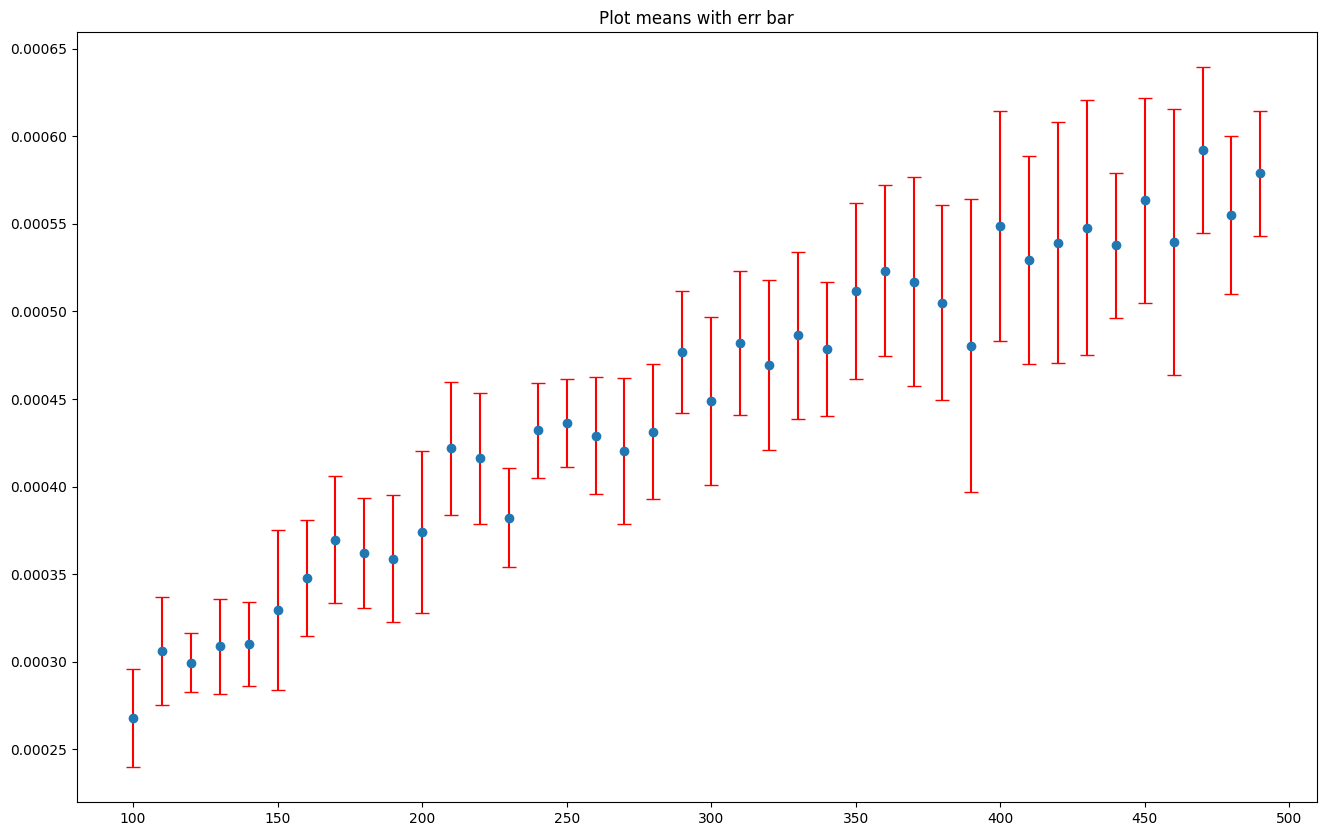

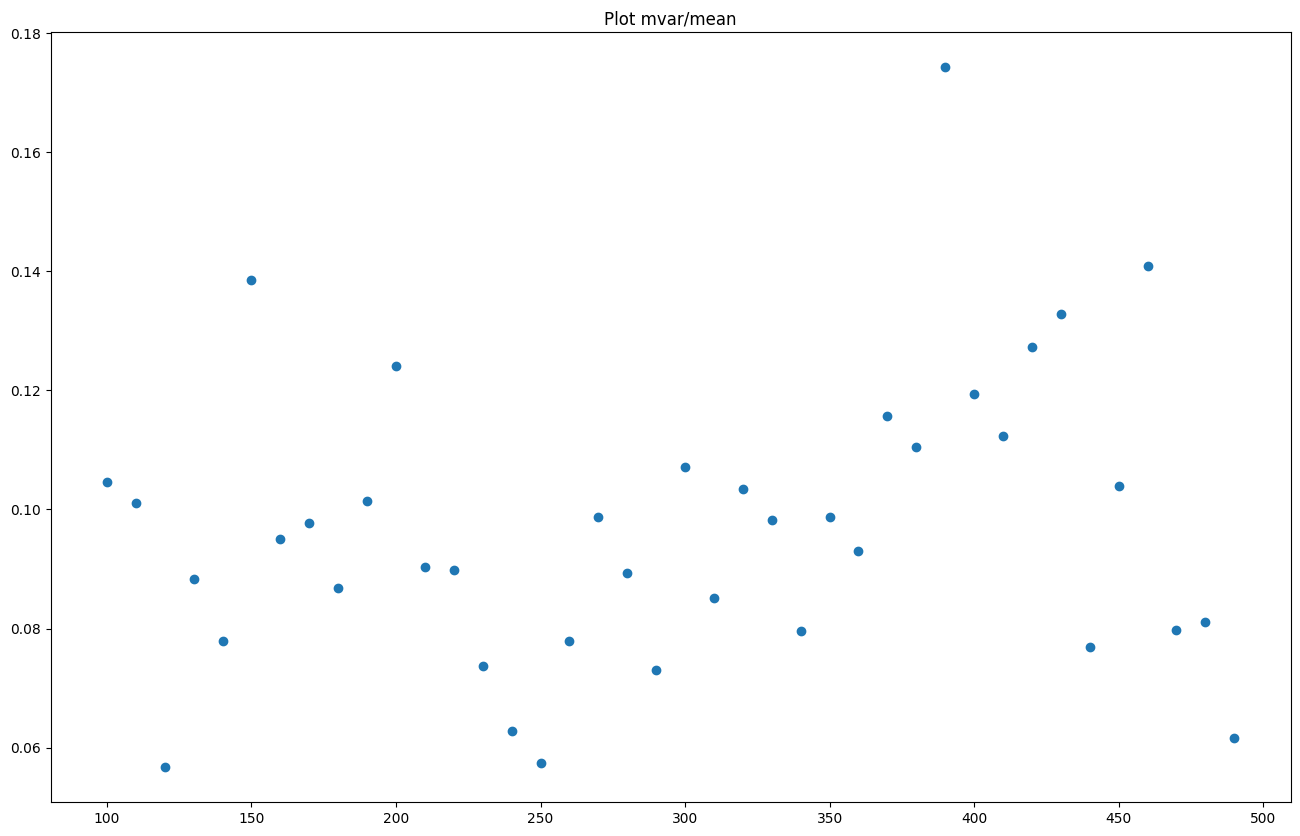

In [2]:
test_hyp(n_reps=10, lambdas=np.arange(100,500,10))

In [6]:

def test_errors(n_reps,lambdas = [200, 300, 500], A = 50, f=100):
    Ns = []
    peaks_mean=[]
    peaks_std = []
    for lambda_ in lambdas:
        n_parts=200e3
        n_turns = 200e3
        blm = fake_data.generate_fake_blm(n_parts, n_turns, warnings = True, A = A)
        binning = lambda_ # cause the overall extr rate is one 
        
        peaks = []
        
        for n in range(n_reps):
            bins = fake_data.bin_fake_data(blm,turn_binning = binning, add_errors=True,normalize_turns=True, plot=False )
            fftres = du.Ft(bins[1],bins[0][1], normalize_N=False, plot=False, window='flattop')
            peaks.append(np.interp(f,fftres[0],fftres[1]))
            if n==0:
                Ns.append(len(bins[1])) # For the final formula to chek
        peaks_mean.append(np.mean(peaks)) # mean for every lambda value
        peaks_std.append( np.std(peaks)) 
        ### Data to numpy
    peaks_mean = np.array(peaks_mean)
    peaks_std = np.array(peaks_std)
    Ns = np.array(Ns)
    lambdas = np.array(lambdas)
    
    fluctuations_pred = 4*Ns**2 *lambdas**3 / (Ns*lambdas**2 + A**2/2)
    #print(len(fluctuations_pred))
        
    plt.figure(figsize=(16,10))
    plt.errorbar(lambdas, peaks_mean, yerr=peaks_std, fmt='o', ecolor='red', capsize=5)
    
    plt.title('Plot means with err bar')
    plt.figure(figsize=(16,10))
    #plt.plot(lambdas,fluctuations_pred)
    plt.scatter(lambdas, peaks_std/peaks_mean)
    plt.title('Plot mvar/mean')
        
        
            
        

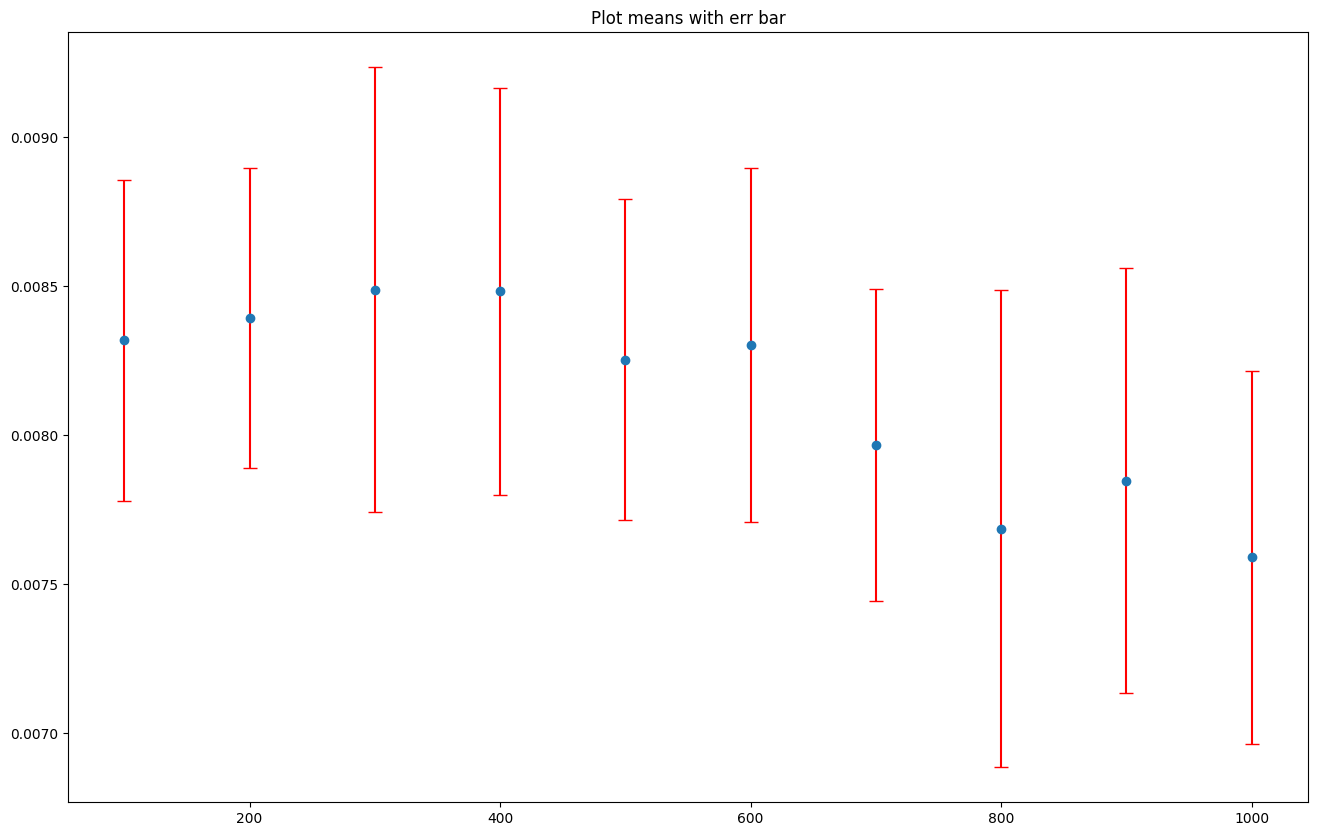

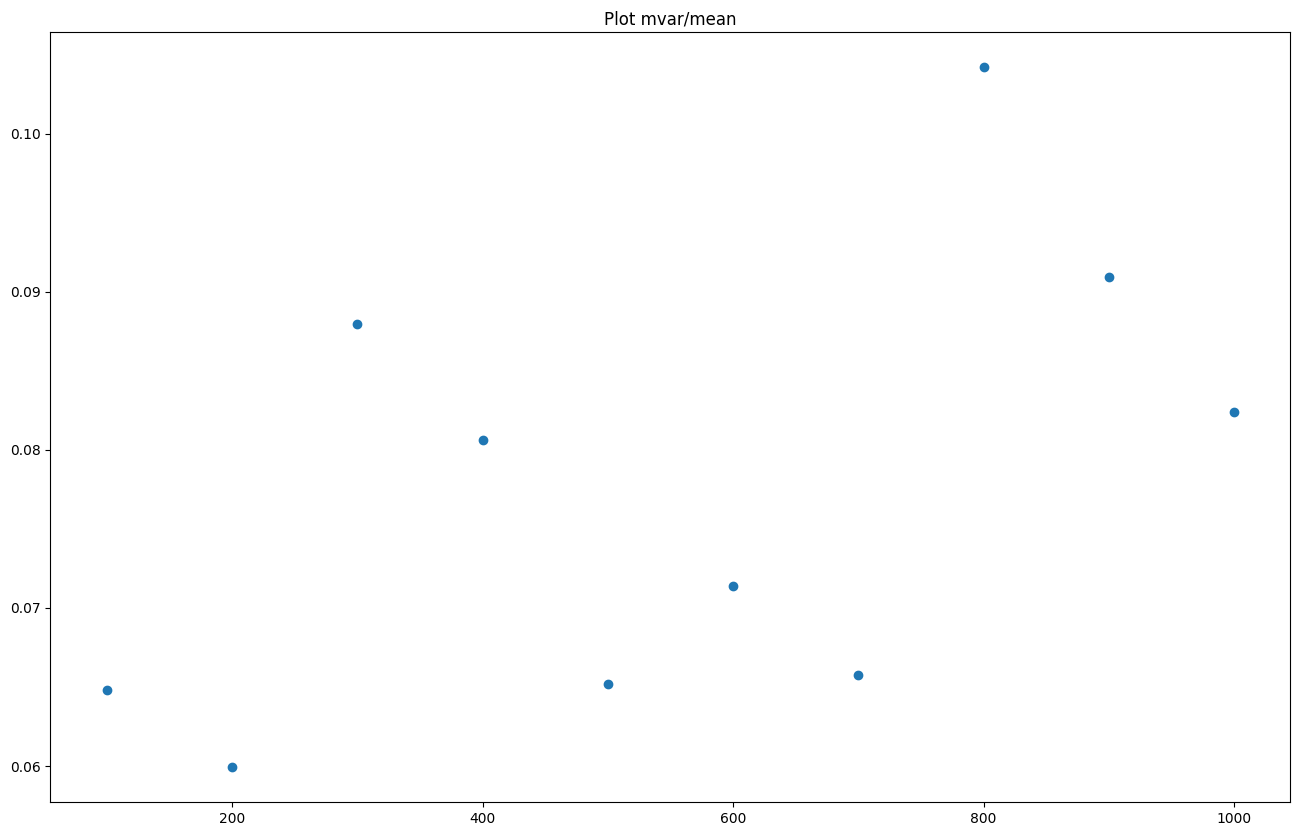

In [9]:
test_errors(30,lambdas=np.linspace(100,1000,10,dtype=int))

### Tests on the assumptions to the hypotesis

In [46]:

from scipy import integrate
# MEAN OF THE SINE IS THAT
dc_part = 10
lambda_ = dc_part
A = 1
mean = []
var = []
for n in range(1000000):
    t,sine = fake_data.centered_sine(A = A,just_signal=True,samplef_to_f_ratio=100,dc_part=dc_part,add_errors=True)
    fftre = du.Ft(sine,t[1],normalize_N=False, plot = False)
    mean.append(np.mean(sine-dc_part))
    var.append(integrate.trapezoid((sine-dc_part)**2,t))
N = len(sine)
np.mean(var), A**2/2

(1.0449332463880614, 0.5)

In [7]:
(np.sum(2*fftre[1][1:]**2)+ fftre[1][0]**2)/len(sine)

30436.890920876172

In [8]:
np.sum(sine**2)

30437.295920876175

In [47]:
len(sine)

200

In [48]:
len(fftre[1])

100

In [9]:
np.mean(sine)

9.725

In [38]:
integrate.trapezoid((sine-dc_part)**2)

2154.654894326436

In [41]:
(sine-dc_part)**2

array([4.00000000e+00, 3.52504564e+01, 3.45117096e+01, 1.01593996e+01,
       1.55922643e+00, 1.36233555e+01, 1.31905193e+01, 6.62661226e+00,
       6.15910130e+00, 6.07214958e+00, 1.94676390e+01, 7.46050932e+01,
       1.09922279e+01, 5.15758350e+00, 7.67574363e+00, 7.89057647e+00,
       1.33557794e+00, 1.26268668e+00, 8.43802020e+00, 4.93134193e-03,
       9.04508497e-01, 9.87017765e-04, 2.48231862e+01, 6.21779354e-05,
       4.00789698e+00, 1.60000000e+01, 3.89380070e-06, 9.04737397e+00,
       9.64888243e-01, 9.87017765e-04, 2.39546460e-03, 4.28582540e+00,
       3.48669825e+01, 3.52052676e+00, 8.09020135e+00, 3.64745084e-02,
       5.93690657e-01, 1.39052070e+01, 7.20679316e+00, 1.13069174e+01,
       1.28722030e+01, 2.15456764e-01, 6.15910130e+00, 2.03284659e+00,
       1.35515686e-01, 4.77457514e-01, 3.06708711e+00, 1.40987439e+00,
       3.45117096e+01, 3.94264934e-03, 1.00000000e+00, 4.25510473e+00,
       1.26637489e+00, 6.60349128e-01, 6.18466600e-02, 5.91512196e+01,
      